In [1]:
# Creating topic clusters from keywords.

In [51]:
# keywords database struct
# stores the keywords and the url of the webpages they were extracted from.

keywords = {
            'tennis' : ['url0', 'url1', 'url2', ...], 
            'backhand' : ['url0', 'url1', 'url2', ...], 
            'ball' : ['url0', 'url1', 'url2', ...], 
            'run' : ['url0', 'url1', 'url2', ...],
            'code' : ['url0', 'url1', 'url2', ...],
            'racquet' : ['url0', 'url1', 'url2', ...], 
            'function' : ['url0', 'url1', 'url2', ...],     
            'python' : ['url0', 'url1', 'url2', ...], 
            'graph' : ['url0', 'url1', 'url2', ...], 
            }

In [52]:
#networkx library for graph creation and clustering

import networkx as nx
import matplotlib.pyplot as plt 

In [53]:
graph_keywords = nx.Graph()
graph_keywords.add_nodes_from(keywords.keys())

In [54]:
graph_keywords.nodes

NodeView(('tennis', 'backhand', 'ball', 'run', 'code', 'racquet', 'function', 'python', 'graph'))

ValueError: too many values to unpack (expected 2)

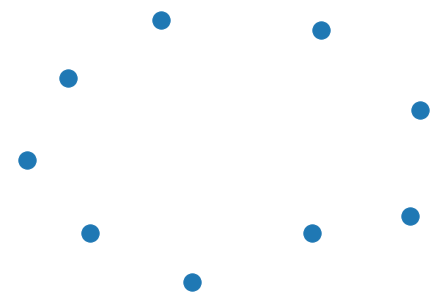

In [60]:
labels = {}
for word in keywords.keys():
    labels[word] = word
    
nx.draw(graph_keywords)
nx.draw_networkx_labels(graph_keywords, labels)

In [14]:
# check if word present in a webpage.

def word_present(word, url):
    #
    #
    
    return True
    

In [17]:
# Creates edges between keywords that appear on the same webpage and hence have a high probability of being related to some common topic.
# Complexity O(N^2 * M) where N is the number of keywords and M is the length of the URL list.
# Can be done faster and on-the-go while the user browses new webpages, using browser extension.

def connect_graph():
    for word_i in keywords.keys() :
        url_list = keywords[word_i]
        for url in url_list:
            for word_j in keywords.keys():
                if word_i==word_j:
                    continue
                #check if word_i and word_j are both present on the same page
                if(word_present(word_j, url)):
                    graph_keywords.add_edge(word_i, word_j)

In [76]:
graph_keywords.add_edges_from([('tennis', 'ball'), 
                                ('tennis', 'backhand'), 
                                ('ball', 'backhand'), 
                                ('code', 'python'), 
                                ('python', 'function'), 
                                ('graph', 'python'), 
                                ('run', 'tennis'),
                                ('tennis', 'racquet'), 
                                ('run', 'function'), 
                                ('graph', 'function'), 
                                ('run', 'code')
                              ])

In [18]:
connect_graph()

In [41]:
def community_layout(g, partition):
    # Compute the layout for a modular graph.
    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

In [42]:
def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

In [43]:
def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

In [44]:
def _position_nodes(g, partition, **kwargs):

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [77]:
#from networkx.algorithms import community
import community

clusters = community.best_partition(graph_keywords)
pos = community_layout(graph_keywords, clusters)

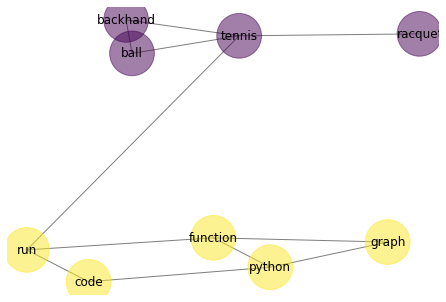

In [78]:
nx.draw(graph_keywords, pos, node_color=list(clusters.values()), node_size=2000, alpha = 0.5)

labels = {}
for word in keywords.keys():
    labels[word] = word
nx.draw_networkx_labels(graph_keywords, pos, labels)

plt.show()